根据预测的样本数据结果绘制ROC曲线
预测数据存在csv文件中，其中：
-    第一列的名称为：'predict score'  （名称最好用这个，否则程序要跟着变化）（源文件中）
-    第二列的名称为：'label'  （最好别变，否则程序要跟着变化）
-    数据第一列是每个样本的predict 分数，包括正样本和负样本的（正负样本的位置无所谓，程序会自动排序等处理）；
-    第二列式每个样本的实际label，值分别是0（负样本）和1（正样本）。

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 定义函数

In [59]:
def ROC_calculate(df, percent_num = 20):
    """该函数根据一系列样本的预测值计算ROC曲线（不绘图）
        df：一系列样本的预测结果，共两列，第一列名称为‘predict score’，值区间[0,1]；第二列名称为‘lable’，值是0（负样本）或1（正样本）
        percent_num：百分点数（0-100%划分成多少个区间）
    """

    df = df.sort_values('predict score',ascending=False)  # 将所有样本按照预测值从大到小排序

    total_sample_num = df.shape[0]  # 样本总数（包含正负）
    total_pos_sample_num = df['label'].value_counts()[1]  # 正样本个数，在数据中，正样本的标签是‘1’
    total_neg_sample_num = df['label'].value_counts()[0]  # 负样本个数，在数据中，负样本的标签是‘0’
    print(f'样本总数：{total_sample_num}；正样本数：{total_pos_sample_num}；负样本数：{total_neg_sample_num}')

    roc_x = []  # 存放roc_x值
    roc_y = []  # 存放roc_y值

    for percent in np.linspace(0,1,percent_num):  # 百分比断点
        top_sample_num = int(np.floor(total_sample_num*percent))  # 根据百分数抽取排序后的前top_sample_num个样本信息（包括正负）
        # print(top_sample_num)

        if 0<=top_sample_num<=total_sample_num:  # 确保抽取的样本数有效

            #  统计抽取的样本中负样本的个数
            try:
                top_negative_sample_num = df[:top_sample_num]['label'].value_counts()[0]
                # print(top_negative_sample_num)
            except:
                top_negative_sample_num = 0
            roc_x.append(top_negative_sample_num/total_neg_sample_num)


            #  统计抽取的样本中正样本的个数
            try:
                top_positive_sample_num = df[:top_sample_num]['label'].value_counts()[1]
                # print(top_positive_sample_num)
            except:
                top_positive_sample_num = 0
            roc_y.append(top_positive_sample_num/total_pos_sample_num)

        else:
            print('Warning: 抽取的样本数有误！')

    return roc_x, roc_y

In [60]:
def AUC_calculate(roc_x, roc_y):
    """该函数根据ROC结果计算ACU值，采用梯形积分方法
        roc_x：roc的x坐标，由Roc_calculate()函数计算得到
        roc_y：roc的y坐标，由Roc_calculate()函数计算得到
    """
    AUC = 0

    for i in range(len(roc_x)-1):
        AUC += (roc_y[i]+roc_y[i+1])*(roc_x[i+1]-roc_x[i])/2

    return AUC

In [61]:
def Roc_plot(roc_x, roc_y):
    '''ROC绘图
        roc_x：roc的x坐标，由Roc_calculate()函数计算得到
        roc_y：roc的y坐标，由Roc_calculate()函数计算得到
    '''
    
    my_xticks = np.round(np.linspace(0,1,11),decimals=2)  # x显示刻度
    my_yticks = np.round(np.linspace(0,1,11),decimals=2)  # y显示刻度

    figure=plt.figure(figsize=(15,15),dpi=30)

    plt.plot(roc_x,roc_y,color="r",linestyle="-" ,linewidth=5.0,marker='*',markersize=20)   # 实际roc曲线
    plt.fill_between(roc_x, roc_y, color='deepskyblue', alpha=0.4)  # 填充roc曲线面积，即AUC区域
    plt.plot(roc_x,roc_x,color="b",linestyle="--",linewidth=4.0,marker='*',markersize=20)   # 45°参考线


    plt.legend(['ROC'],fontsize = 36, loc = 'lower right', ncol = 2)  # 曲线标记

    plt.xticks(my_xticks, my_xticks, color='r', fontsize=30)
    plt.yticks(my_yticks, my_yticks, color='r', fontsize=30)

    plt.grid(True,linestyle="--",alpha=0.4,color='b')
    plt.title("ROC curve",color='r',fontsize=40)
    plt.xlabel("False Positive Rate",color='r',fontsize=40)
    plt.ylabel("True Positive Rate",color='r',fontsize=40)

#     # 图片保存
#     # plt.tight_layout() # ⾃动调整布局空间，就不会出现图⽚保存不完整
#     plt.savefig('./ROC.png', # ⽂件名：png、jpg、pdf
#                  dpi = 100, # 保存图⽚像素密度
#                  facecolor = 'white', # 视图与边界之间颜⾊设置
#                  edgecolor = 'lightgreen', # 视图边界颜⾊设置
#                  bbox_inches = 'tight')# 保存图⽚完整

    plt.show()

# 应用（model 1的结果）

In [62]:
df1 = pd.read_csv('predict_result_len400.csv')  # 读取结果文件
df2 = pd.read_csv('predict _result_Cas1_uniref50_len400to1300.csv')  # 读取结果文件
df3 = pd.read_csv('predict_result_Cas1_and_part_other_Cas.csv')  # 读取结果文件

样本总数：19193；正样本数：10354；负样本数：8839


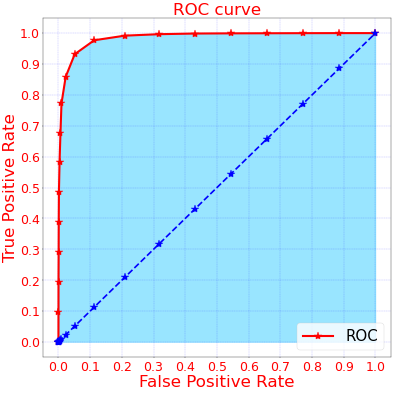

AUC=0.9851465279244839
样本总数：2419；正样本数：1221；负样本数：1198


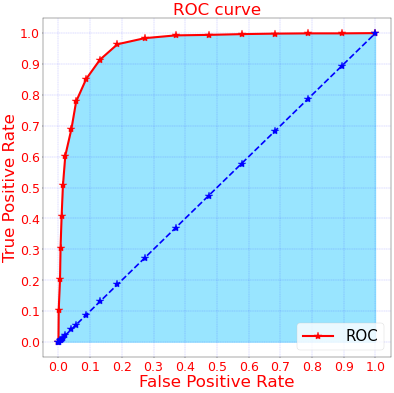

AUC=0.9565105779629987
样本总数：22913；正样本数：11637；负样本数：11276


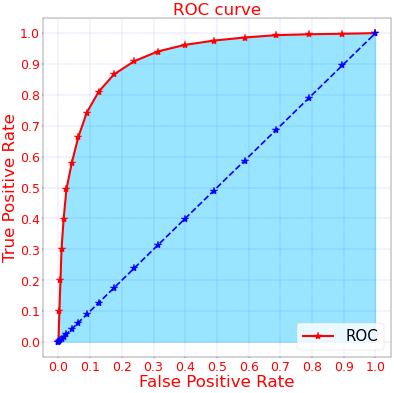

AUC=0.9191934689974177


In [63]:
roc_x1, roc_y1 = ROC_calculate(df1, percent_num = 20)
Roc_plot(roc_x1,roc_y1)
AUC1 = AUC_calculate(roc_x1,roc_y1)
print(f'AUC={AUC1}')

roc_x2, roc_y2 = ROC_calculate(df2, percent_num = 20)
Roc_plot(roc_x2,roc_y2)
AUC2 = AUC_calculate(roc_x2,roc_y2)
print(f'AUC={AUC2}')

roc_x3, roc_y3 = ROC_calculate(df3, percent_num = 20)
Roc_plot(roc_x3,roc_y3)
AUC3 = AUC_calculate(roc_x3,roc_y3)
print(f'AUC={AUC3}')

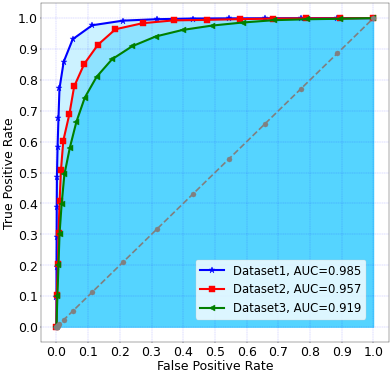

In [64]:
# 画在一张图上
my_xticks = np.round(np.linspace(0,1,11),decimals=2)  # x显示刻度
my_yticks = np.round(np.linspace(0,1,11),decimals=2)  # y显示刻度

figure=plt.figure(figsize=(15,15),dpi=30)

p1, = plt.plot(roc_x1, roc_y1, color="b", linestyle="-", linewidth=5.0, marker='*', markersize=16)   # 实际roc曲线
plt.fill_between(roc_x1, roc_y1, color='deepskyblue', alpha=0.2)  # 填充roc曲线面积，即AUC区域
p2, = plt.plot(roc_x2, roc_y2, color="r", linestyle="-", linewidth=5.0, marker='s', markersize=16)   # 实际roc曲线
plt.fill_between(roc_x2, roc_y2, color='deepskyblue', alpha=0.3)  # 填充roc曲线面积，即AUC区域
p3, = plt.plot(roc_x3, roc_y3, color="g", linestyle="-", linewidth=5.0, marker='<', markersize=16)   # 实际roc曲线
plt.fill_between(roc_x3, roc_y3, color='deepskyblue', alpha=0.4)  # 填充roc曲线面积，即AUC区域


plt.plot(roc_x1,roc_x1,color="gray",linestyle="--",linewidth=4.0,marker='o',markersize=12)   # 45°参考线


plt.legend([p1,p2,p3],['Dataset1, AUC=0.985','Dataset2, AUC=0.957','Dataset3, AUC=0.919'] ,fontsize=28, loc='lower right', ncol=1, bbox_to_anchor=(0.95,0.05))  # 曲线标记
plt.xticks(my_xticks, my_xticks, color='k', fontsize=30)
plt.yticks(my_yticks, my_yticks, color='k', fontsize=30)
plt.grid(True,linestyle="--",alpha=0.4,color='b')
# plt.title("ROC curve",color='k',fontsize=40)
plt.xlabel("False Positive Rate",color='k',fontsize=30)
plt.ylabel("True Positive Rate",color='k',fontsize=30)

# 图片保存
# plt.tight_layout() # ⾃动调整布局空间，就不会出现图⽚保存不完整
plt.savefig('./Model1_ROC.png', # ⽂件名：png、jpg、pdf
             dpi = 100, # 保存图⽚像素密度
             facecolor = 'white', # 视图与边界之间颜⾊设置
             edgecolor = 'lightgreen', # 视图边界颜⾊设置
             bbox_inches = 'tight')# 保存图⽚完整

plt.show()

# 应用（model 2的结果）

In [65]:
df1= pd.read_csv('predict_result_Cas1_Uniref50_len400_model2.csv')  # 读取结果文件
df2 = pd.read_csv('predict_result_Cas1_uniref50_len400to1300_model2.csv')  # 读取结果文件
df3 = pd.read_csv('predict_result_Cas1_and_part_other_Cas_model2.csv')  # 读取结果文件

样本总数：19193；正样本数：10354；负样本数：8839


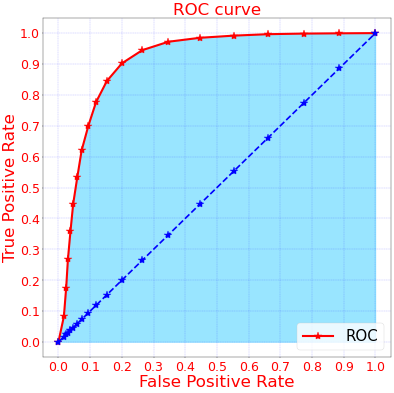

AUC=0.911096269992268
样本总数：2419；正样本数：1221；负样本数：1198


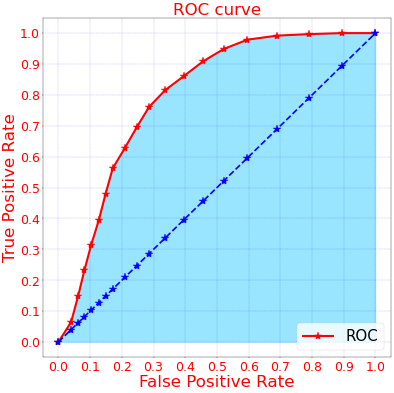

AUC=0.7960978507723082
样本总数：22913；正样本数：11637；负样本数：11276


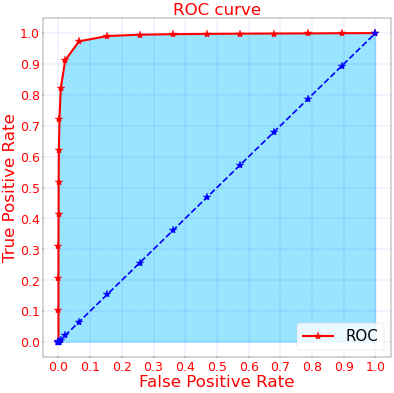

AUC=0.9896404792934721


In [66]:
roc_x1, roc_y1 = ROC_calculate(df1, percent_num = 20)
Roc_plot(roc_x1,roc_y1)
AUC1 = AUC_calculate(roc_x1,roc_y1)
print(f'AUC={AUC1}')

roc_x2, roc_y2 = ROC_calculate(df2, percent_num = 20)
Roc_plot(roc_x2,roc_y2)
AUC2 = AUC_calculate(roc_x2,roc_y2)
print(f'AUC={AUC2}')

roc_x3, roc_y3 = ROC_calculate(df3, percent_num = 20)
Roc_plot(roc_x3,roc_y3)
AUC3 = AUC_calculate(roc_x3,roc_y3)
print(f'AUC={AUC3}')

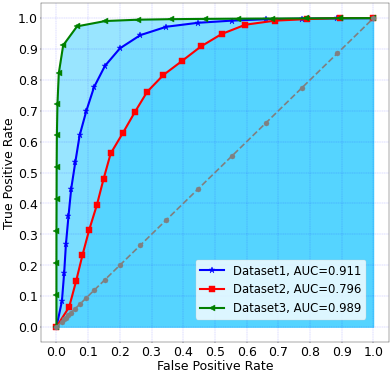

In [67]:
# 画在一张图上
my_xticks = np.round(np.linspace(0,1,11),decimals=2)  # x显示刻度
my_yticks = np.round(np.linspace(0,1,11),decimals=2)  # y显示刻度

figure=plt.figure(figsize=(15,15),dpi=30)

p1, = plt.plot(roc_x1, roc_y1, color="b", linestyle="-", linewidth=5.0, marker='*', markersize=16)   # 实际roc曲线
plt.fill_between(roc_x1, roc_y1, color='deepskyblue', alpha=0.2)  # 填充roc曲线面积，即AUC区域
p2, = plt.plot(roc_x2, roc_y2, color="r", linestyle="-", linewidth=5.0, marker='s', markersize=16)   # 实际roc曲线
plt.fill_between(roc_x2, roc_y2, color='deepskyblue', alpha=0.3)  # 填充roc曲线面积，即AUC区域
p3, = plt.plot(roc_x3, roc_y3, color="g", linestyle="-", linewidth=5.0, marker='<', markersize=16)   # 实际roc曲线
plt.fill_between(roc_x3, roc_y3, color='deepskyblue', alpha=0.4)  # 填充roc曲线面积，即AUC区域


plt.plot(roc_x1,roc_x1,color="gray",linestyle="--",linewidth=4.0,marker='o',markersize=12)   # 45°参考线


plt.legend([p1,p2,p3],['Dataset1, AUC=0.911','Dataset2, AUC=0.796','Dataset3, AUC=0.989'] ,fontsize=28, loc='lower right', ncol=1, bbox_to_anchor=(0.95,0.05))  # 曲线标记
plt.xticks(my_xticks, my_xticks, color='k', fontsize=30)
plt.yticks(my_yticks, my_yticks, color='k', fontsize=30)
plt.grid(True,linestyle="--",alpha=0.4,color='b')
# plt.title("ROC curve",color='k',fontsize=40)
plt.xlabel("False Positive Rate",color='k',fontsize=30)
plt.ylabel("True Positive Rate",color='k',fontsize=30)

# 图片保存
# plt.tight_layout() # ⾃动调整布局空间，就不会出现图⽚保存不完整
plt.savefig('./Model2_ROC.png', # ⽂件名：png、jpg、pdf
             dpi = 100, # 保存图⽚像素密度
             facecolor = 'white', # 视图与边界之间颜⾊设置
             edgecolor = 'lightgreen', # 视图边界颜⾊设置
             bbox_inches = 'tight')# 保存图⽚完整

plt.show()